In [1]:
from gensim.models import word2vec
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

In [3]:
text8 = os.path.join('/wendy/capstone','text8')
sentences = word2vec.Text8Corpus(text8)
model = word2vec.Word2Vec(sentences,seed = 0)
model.save('text8Word2Vec')
word_vectors = model.wv
del model

In [4]:
sentences.max_sentence_length

10000

In [5]:
word_vectors.most_similar('gun')

[('rifle', 0.816495418548584),
 ('weapon', 0.7939631938934326),
 ('pistol', 0.7929584980010986),
 ('gatling', 0.7737590074539185),
 ('submachine', 0.7707523107528687),
 ('guns', 0.7656704187393188),
 ('cannon', 0.7042506337165833),
 ('rifles', 0.7041829824447632),
 ('tank', 0.6991287469863892),
 ('ammunition', 0.6976094245910645)]

In [11]:
vocab = list(word_vectors.vocab.keys())

In [12]:
from sklearn.decomposition import PCA
vectors_raw = []
for key in vocab:
    vectors_raw.append(word_vectors[key])
vecs_pca = PCA(n_components = 2,random_state = 0).fit_transform(vectors_raw)

In [13]:
l_category = ['graphics','windows','ibm','hardware','mac','forsale','autos','motorcycles','baseball',
           'hockey','guns','mideast','crypt','electronics','med','space','atheism','christian','religion',
           'politics','university','sport']
l_index = []
unks = []
for item in l_category:
    if item not in vocab:
        unks.append(item)
    else:
        l_index.append(vocab.index(item))
        similar_words = word_vectors.most_similar(item)
        for similar_word in similar_words:
            l_index.append(vocab.index(similar_word[0]))
print (len(l_index))

231


In [14]:
pca_plt = []
voc_plt = []
for index in l_index:
    pca_plt.append(vecs_pca[index])
    voc_plt.append(vocab[index])

In [15]:
max = np.max([np.max(list(zip(*pca_plt))[0]),np.max(list(zip(*pca_plt))[1])])

min = np.min([np.min(list(zip(*pca_plt))[0]),np.min(list(zip(*pca_plt))[1])])
 
print (max,min)

8.737704989941617 -5.9100284907204985


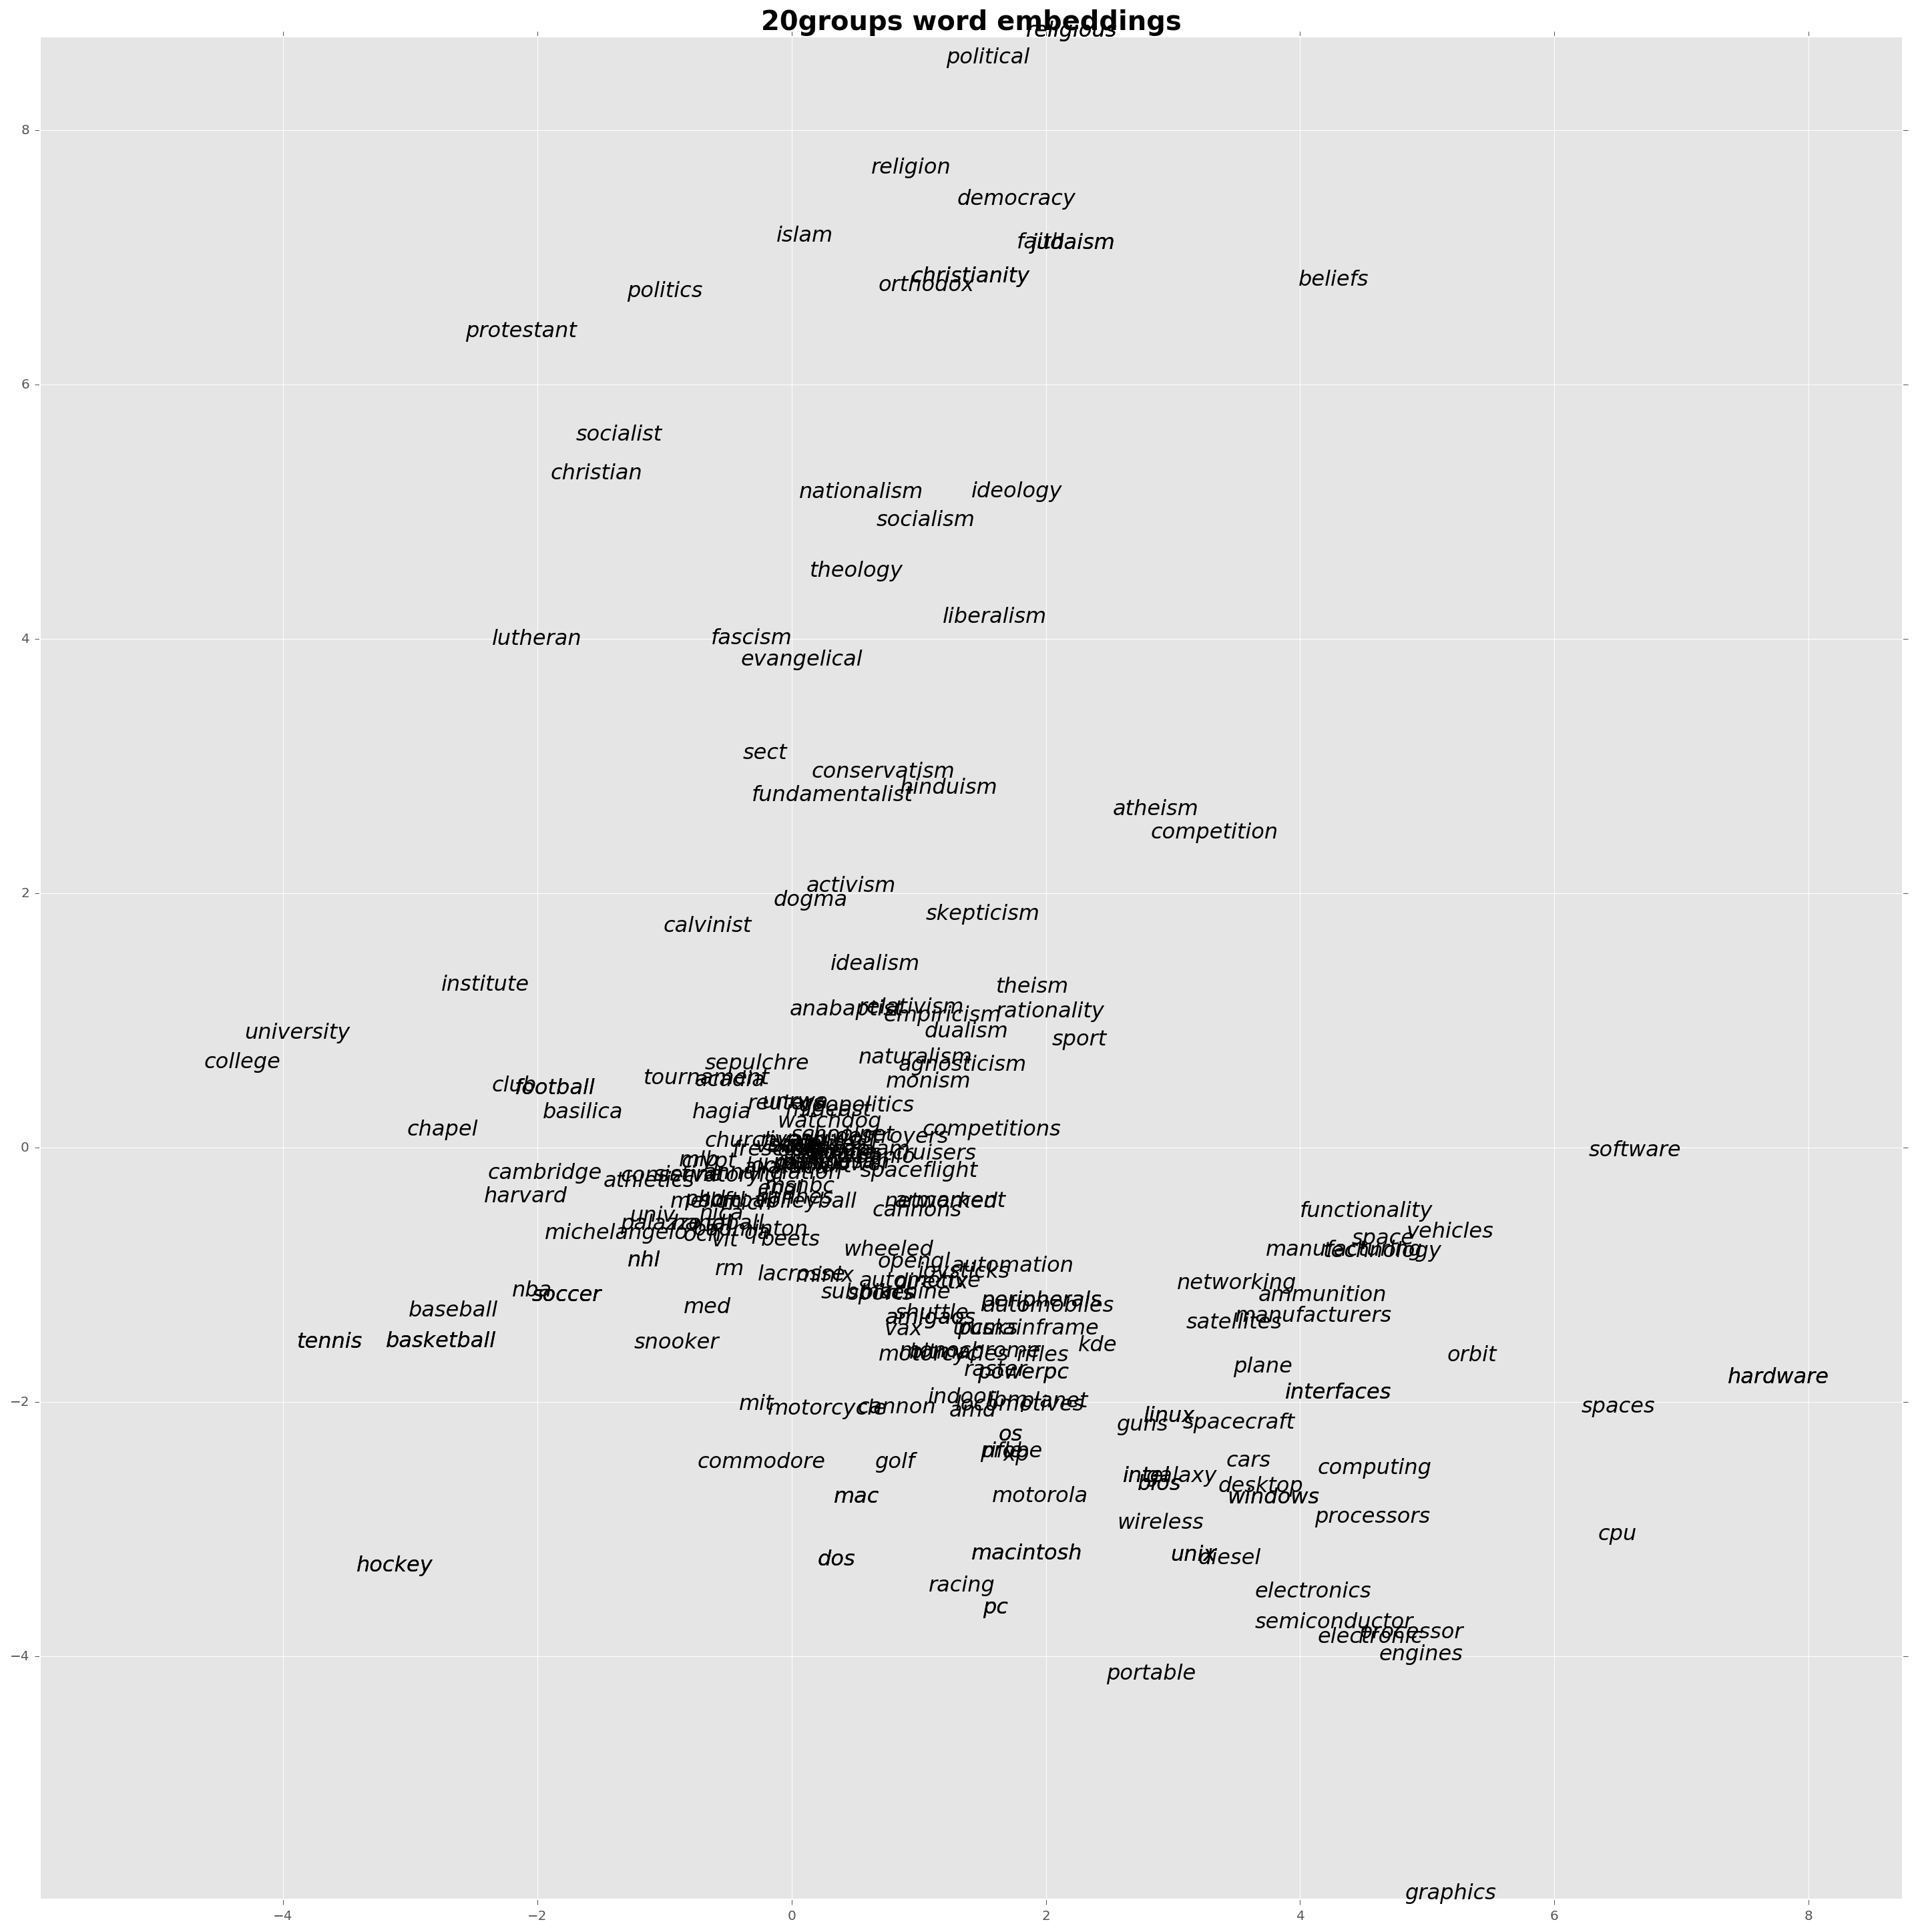

In [25]:
%config InlineBackend.figure_format = 'retina'

plt.style.use("ggplot")

fig_wv = plt.figure(figsize = (25,25))
ax = fig_wv.add_subplot(111)
for i in range(len(l_index)):
    ax.text(pca_plt[i][0],pca_plt[i][1],voc_plt[i],style = 'italic',fontsize = 16)
ax.axis([min,max,min,max])
plt.title('20groups word embeddings', fontsize = 20, fontweight = 'bold')
plt.show()

In [26]:
path = os.path.join('/wendy/capstone','w2v vectors.txt')
with open(path,'wb') as f:
    pickle.dump(word_vectors,f)
    pickle.dump(vecs_pca,f)
    pickle.dump(pca_plt,f)
    pickle.dump(voc_plt,f)